Ajustes:
Cadena 1:
	 m = 1.8803765374304366	 b = 3.01484698555374
Cadena 2:
	 m = 2.030706389369388	 b = 2.9443402873205513
Cadena 3:
	 m = 1.9639512455903634	 b = 3.04250879223805
Cadena 4:
	 m = 1.9881739347033003	 b = 2.9761116938856245


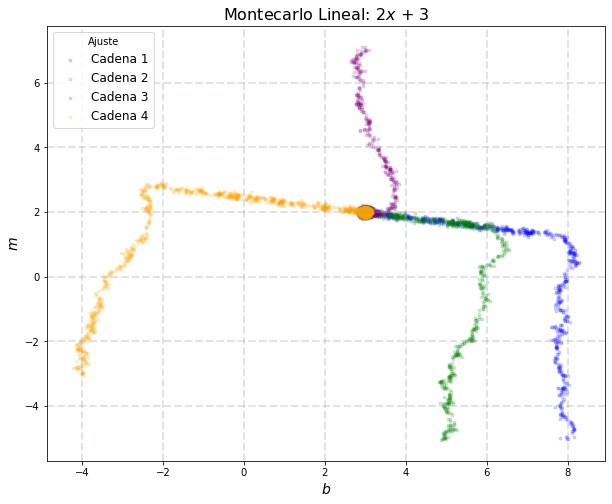

In [2]:
from scipy import random
import numpy as np
import matplotlib.pyplot as plt
colors = ['blue', 'green', 'purple', 'orange', 'red', 'yellow']

NMAX = 10000
size = 1000
chains = 4
theory = [2, 3]
x = np.linspace(0, 10, size)
y = theory[0]*x + theory[1]
sigmaP = [0.05, 0.05]
sigmaT = 0.05 * np.ones(size)
p0 = [[-5, 8], [-5, 5], [7, 3], [-3, -4]]

def lnL(model, data, sigmaT, theory, theta):
    return -0.5 * np.sum(((theory - model(data, theta)))**2/sigmaT**2)
    
def monteCarloN(model, data, sigmaT, sigmaP, theory, p0, chains):
    
    chainList = []
        
    for i in range(0, chains):
        
        chain = []
        L0 = lnL(model, data, sigmaT, theory, p0[i])
        chain.append([p0[i], L0])

        for j in range(0, NMAX):
            newp = []
            for index, value in enumerate(p0[i]): newp.append(sigmaP[index] * np.random.randn() + value)            
            newL = lnL(model, data, sigmaT, theory, newp)

            if(newL > L0):
                chain.append([newp, newL])
                p0[i] = newp
                L0 = newL
                continue        
            elif(newL/L0 > np.random.randn()): chain.append([newp, newL])

            else: chain.append([newp, newL])
        chainList.append(chain)
            
    return chainList
            
def line(x, theta):
    return theta[0]*x + theta[1]

chainList = monteCarloN(line, x, sigmaT, sigmaP, y, p0, chains)
xdotsList, ydotsList = [], []

for chain in chainList:
    dots, likelihoods = [], []
    xdots, ydots = [], []

    for i in range(0, len(chain)):
        dots.append(chain[i][0])
        likelihoods.append(chain[i][1])

    for i in range(0, len(dots)):
        xdots.append(dots[i][0])
        ydots.append(dots[i][1])
        
    xdotsList.append(xdots)
    ydotsList.append(ydots)

fig, ax0 = plt.subplots(figsize=(10, 8))

for i in range(0, len(chainList)):
    plt.scatter(ydotsList[i], xdotsList[i], color = colors[i], alpha = 0.15, marker = '.',  label = 'Cadena ' + str(i + 1))
plt.xlabel('$b$', fontsize = 14)
plt.ylabel('$m$', fontsize = 14)
plt.title('Montecarlo Lineal: ' + str(theory[0]) + '$x$ ' + '+ ' + str(theory[1]), fontsize = 16)
plt.legend(title = 'Ajuste', loc = 'upper left', fontsize = 12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, alpha=0.3)

print('Ajustes:')
for i in range(0, chains):
    print('Cadena ' + str(i + 1) + ':')
    print('\t m = ' + str(xdotsList[i][-1]) + '\t b = ' + str(ydotsList[i][-1]))